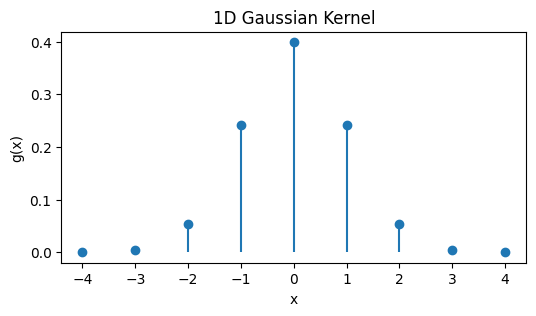

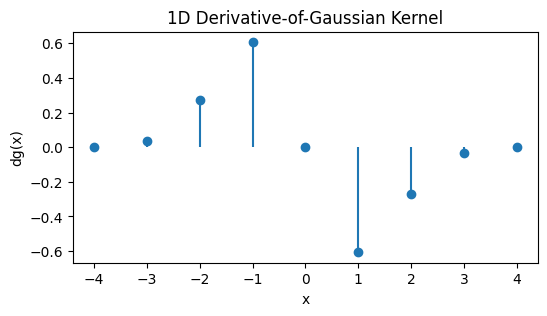

[Separable Convolution] Average absolute difference = 0.000000


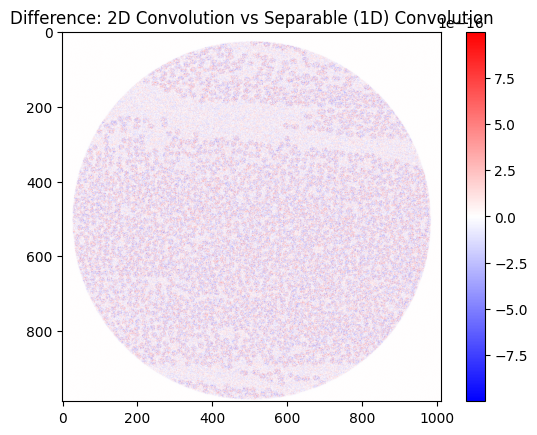

[Derivative Check] Average absolute difference = 0.038010


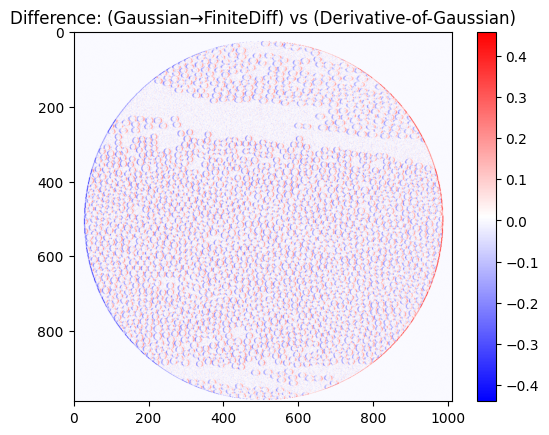

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
import skimage.io
from skimage import img_as_float, color

def create_gaussian_1d(sigma, radius_multiplier=4):
    """
    Create a 1D Gaussian kernel of integer radius ~ radius_multiplier*sigma,
    normalized so that it sums to 1.
    Return both the x-values and the Gaussian array.
    """
    r = int(np.ceil(radius_multiplier * sigma))
    x = np.arange(-r, r + 1)
    g_unnorm = np.exp(-0.5 * (x / sigma)**2)
    g = g_unnorm / np.sum(g_unnorm)
    return x, g

def create_derivative_of_gaussian_1d(sigma, radius_multiplier=4):
    """
    Create a 1D derivative-of-Gaussian kernel, sampled at integer points.
    Return both the x-values and the derivative array.
    """
    r = int(np.ceil(radius_multiplier * sigma))
    x = np.arange(-r, r + 1)
    dg = -x / (sigma**2) * np.exp(-0.5 * (x / sigma)**2)
    return x, dg

def main():
    # 1) Choose a sigma (tune as needed)
    sigma = 1.0

    # 2) Create and plot 1D Gaussian
    x_g, g = create_gaussian_1d(sigma)
    plt.figure(figsize=(6,3))
    plt.stem(x_g, g, basefmt=' ')
    plt.title("1D Gaussian Kernel")
    plt.xlabel("x")
    plt.ylabel("g(x)")
    plt.show()

    # 3) Create and plot 1D derivative-of-Gaussian
    x_dg, dg = create_derivative_of_gaussian_1d(sigma)
    plt.figure(figsize=(6,3))
    plt.stem(x_dg, dg, basefmt=' ')
    plt.title("1D Derivative-of-Gaussian Kernel")
    plt.xlabel("x")
    plt.ylabel("dg(x)")
    plt.show()

    # 4) Load your image: fibres_xcth.png
    image = skimage.io.imread("data/fibres_xcth.png")
    # Convert to float, (and grayscale if needed)
    if image.ndim == 3:
        image = color.rgb2gray(image)
    image = img_as_float(image)

    # 5) Form 2D Gaussian kernel from the outer product of g
    G2D = np.outer(g, g)

    # 6) Convolve image with 2D Gaussian
    image_2D = convolve(image, G2D, mode='reflect')

    # 7) Separable convolution: horizontally, then vertically
    g_row = g.reshape(1, -1)
    g_col = g.reshape(-1, 1)
    image_sep_x = convolve(image, g_row, mode='reflect')
    image_sep_xy = convolve(image_sep_x, g_col, mode='reflect')

    # 8) Compare the two results
    difference = image_2D - image_sep_xy
    avg_abs_diff = np.mean(np.abs(difference))
    print(f"[Separable Convolution] Average absolute difference = {avg_abs_diff:.6f}")

    plt.figure()
    plt.imshow(difference, cmap='bwr')
    plt.title("Difference: 2D Convolution vs Separable (1D) Convolution")
    plt.colorbar()
    plt.show()

    # 9) Demonstrate derivative property
    #    Method A: (Gaussian -> finite-difference derivative)
    derivative_approx = np.array([0.5, 0, -0.5])
    blurred = convolve(image, g_row, mode='reflect')  # blur horizontally
    d_image_A = convolve(blurred, derivative_approx.reshape(1, -1), mode='reflect')

    #    Method B: direct convolution with derivative-of-Gaussian
    d_image_B = convolve(image, dg.reshape(1, -1), mode='reflect')

    # Compare the two derivative results
    diff_deriv = d_image_A - d_image_B
    avg_abs_diff_deriv = np.mean(np.abs(diff_deriv))
    print(f"[Derivative Check] Average absolute difference = {avg_abs_diff_deriv:.6f}")

    plt.figure()
    plt.imshow(diff_deriv, cmap='bwr')
    plt.title("Difference: (Gaussian→FiniteDiff) vs (Derivative-of-Gaussian)")
    plt.colorbar()
    plt.show()

if __name__ == "__main__":
    main()
